# Tentando fazer passo a passo

In [1]:
% display typeset

import numpy as np
import math

In [2]:
def achaBt(t, t0, B0, rho, method = "r"):
    beta = B0
    
    if t != t0:
        if method == "r":
            beta = beta * (1 - rho * (t - t0)/t)
        else:
            beta = beta * math.exp(- rho * (t - t0))
    return beta    

In [3]:
def model(t, comp, params):
    # alpha e f fixos aqui
    S, E, I, R, D, A = comp
    B0, Ti, t0, alpha, rho, f, method = params
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        alpha é constantes
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        f é constante também
    '''
    N = S + E + I + R + D
    beta = achaBt(t, t0, B0, rho, method)
        
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    dA = alpha * E
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD,
        dA
    ]

## Bora fazer por intervalos

Usando alguns parâmetrps fixos

### 1º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


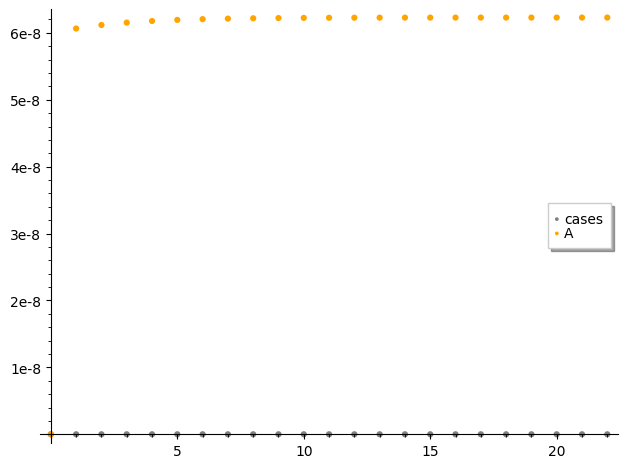

In [4]:
pop   = 60461828
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [1 - 1e-6, 0, 1e-6, 0, 0, 1e-6]

model_out_0_0 = []
model_out_1_0 = []
model_out_2_0 = []
model_out_3_0 = []
model_out_4_0 = []
model_out_5_0 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [0, 22]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_0.append((k[0], k[1][0]))
    model_out_1_0.append((k[0], k[1][1]))
    model_out_2_0.append((k[0], k[1][2]))
    model_out_3_0.append((k[0], k[1][3]))
    model_out_4_0.append((k[0], k[1][4]))
    model_out_5_0.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_0, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_0, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_0, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_0, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_4_0, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

### 2º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


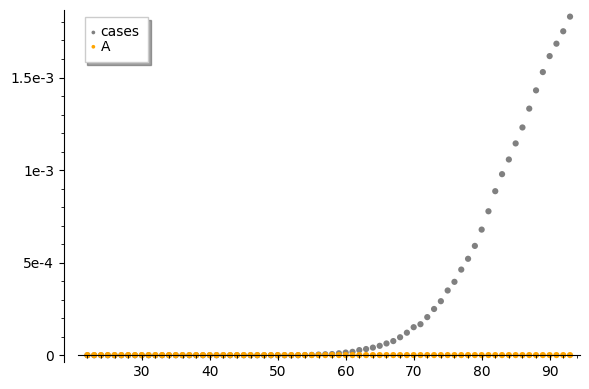

[0.9999989618714406, 7.385126791012532e-12, 6.368989793616083e-13, 9.758333047068362e-07, 6.228723221533008e-08, 1.0381211738211469e-06]


In [5]:
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [model_out_0_0[-1][1], model_out_1_0[-1][1], model_out_2_0[-1][1],
         model_out_3_0[-1][1], model_out_4_0[-1][1], model_out_5_0[-1][1]]

model_out_0_1 = []
model_out_1_1 = []
model_out_2_1 = []
model_out_3_1 = []
model_out_4_1 = []
model_out_5_1 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [22, 93]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_1.append((k[0], k[1][0]))
    model_out_1_1.append((k[0], k[1][1]))
    model_out_2_1.append((k[0], k[1][2]))
    model_out_3_1.append((k[0], k[1][3]))
    model_out_4_1.append((k[0], k[1][4]))
    model_out_5_1.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_1, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_1, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_1, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_1, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5_1, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

print(inits)

### 3º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


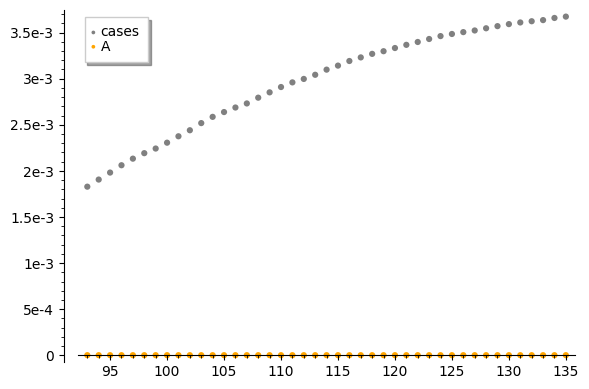

In [6]:
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [model_out_0_1[-1][1], model_out_1_1[-1][1], model_out_2_1[-1][1],
         model_out_3_1[-1][1], model_out_4_1[-1][1], model_out_5_1[-1][1]]

model_out_0_2 = []
model_out_1_2 = []
model_out_2_2 = []
model_out_3_2 = []
model_out_4_2 = []
model_out_5_2 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [93, 135]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_2.append((k[0], k[1][0]))
    model_out_1_2.append((k[0], k[1][1]))
    model_out_2_2.append((k[0], k[1][2]))
    model_out_3_2.append((k[0], k[1][3]))
    model_out_4_2.append((k[0], k[1][4]))
    model_out_5_2.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_2, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_2, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_2, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_2, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5_2, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

### 4º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


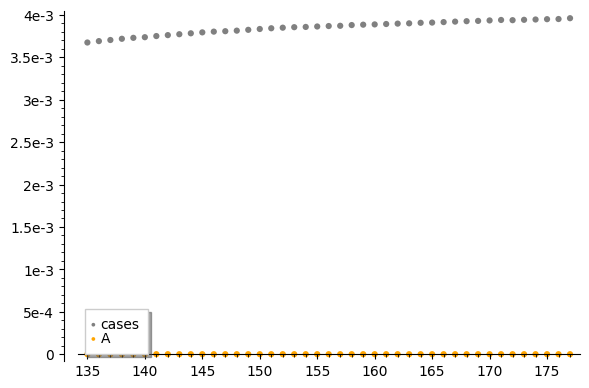

In [7]:
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [model_out_0_2[-1][1], model_out_1_2[-1][1], model_out_2_2[-1][1],
         model_out_3_2[-1][1], model_out_4_2[-1][1], model_out_5_2[-1][1]]

model_out_0_3 = []
model_out_1_3 = []
model_out_2_3 = []
model_out_3_3 = []
model_out_4_3 = []
model_out_5_3 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [135, 177]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_3.append((k[0], k[1][0]))
    model_out_1_3.append((k[0], k[1][1]))
    model_out_2_3.append((k[0], k[1][2]))
    model_out_3_3.append((k[0], k[1][3]))
    model_out_4_3.append((k[0], k[1][4]))
    model_out_5_3.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_3, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_3, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_3, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_3, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5_3, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

### 5º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


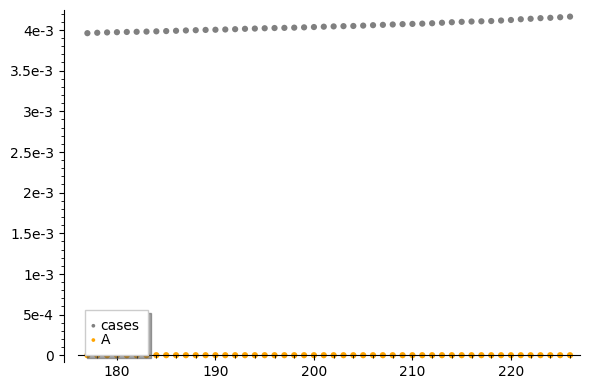

In [8]:
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [model_out_0_3[-1][1], model_out_1_3[-1][1], model_out_2_3[-1][1],
         model_out_3_3[-1][1], model_out_4_3[-1][1], model_out_5_3[-1][1]]

model_out_0_4 = []
model_out_1_4 = []
model_out_2_4 = []
model_out_3_4 = []
model_out_4_4 = []
model_out_5_4 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [177, 226]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_4.append((k[0], k[1][0]))
    model_out_1_4.append((k[0], k[1][1]))
    model_out_2_4.append((k[0], k[1][2]))
    model_out_3_4.append((k[0], k[1][3]))
    model_out_4_4.append((k[0], k[1][4]))
    model_out_5_4.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_4, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_4, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_4, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_4, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

### 6º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


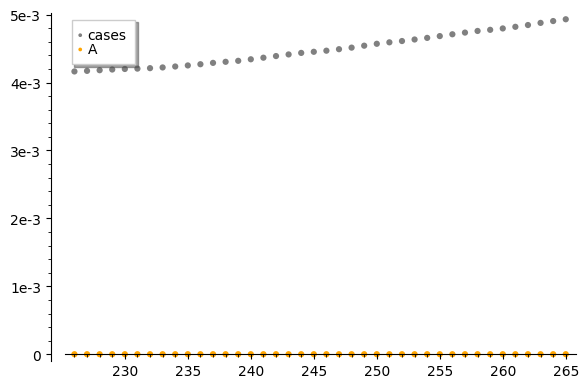

In [9]:
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [model_out_0_4[-1][1], model_out_1_4[-1][1], model_out_2_4[-1][1],
         model_out_3_4[-1][1], model_out_4_4[-1][1], model_out_5_4[-1][1]]

model_out_0_5 = []
model_out_1_5 = []
model_out_2_5 = []
model_out_3_5 = []
model_out_4_5 = []
model_out_5_5 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [226, 265]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_5.append((k[0], k[1][0]))
    model_out_1_5.append((k[0], k[1][1]))
    model_out_2_5.append((k[0], k[1][2]))
    model_out_3_5.append((k[0], k[1][3]))
    model_out_4_5.append((k[0], k[1][4]))
    model_out_5_5.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_5, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_5, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_5, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_5, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_5, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5_5, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

### 7º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


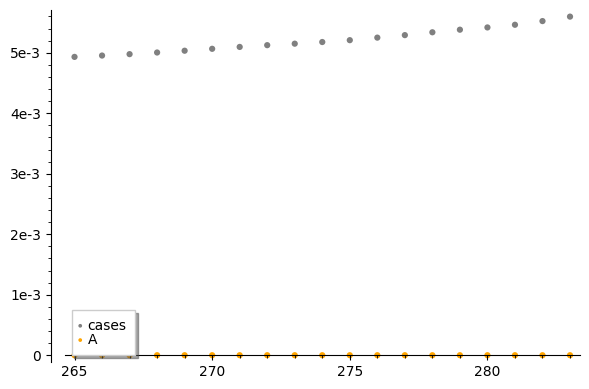

In [10]:
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [model_out_0_5[-1][1], model_out_1_5[-1][1], model_out_2_5[-1][1],
         model_out_3_5[-1][1], model_out_4_5[-1][1], model_out_5_5[-1][1]]

model_out_0_6 = []
model_out_1_6 = []
model_out_2_6 = []
model_out_3_6 = []
model_out_4_6 = []
model_out_5_6 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [265, 283]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_6.append((k[0], k[1][0]))
    model_out_1_6.append((k[0], k[1][1]))
    model_out_2_6.append((k[0], k[1][2]))
    model_out_3_6.append((k[0], k[1][3]))
    model_out_4_6.append((k[0], k[1][4]))
    model_out_5_6.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_6, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_6, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_6, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_6, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_6, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5_6, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

### 8º intervalo

/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/opt/conda/envs/sage/lib/python3.7/site-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


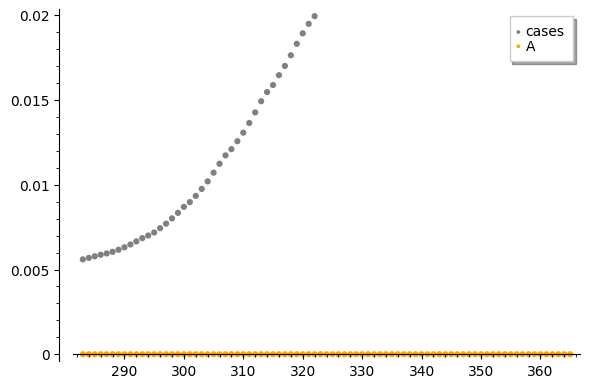

In [11]:
B0    = 0.7
Ti    = 1/14
alpha = 0.40317568962288286
rho   = 0.2697415987313351
f     = 0.06

inits = [model_out_0_6[-1][1], model_out_1_6[-1][1], model_out_2_6[-1][1],
         model_out_3_6[-1][1], model_out_4_6[-1][1], model_out_5_6[-1][1]]

model_out_0_7 = []
model_out_1_7 = []
model_out_2_7 = []
model_out_3_7 = []
model_out_4_7 = []
model_out_5_7 = []
method = "r"

T = ode_solver()
T.function = model
tspan = [283, 365]
T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
            params = [B0, Ti, tspan[0], alpha, rho, f, method])

for k in T.solution:
    model_out_0_7.append((k[0], k[1][0]))
    model_out_1_7.append((k[0], k[1][1]))
    model_out_2_7.append((k[0], k[1][2]))
    model_out_3_7.append((k[0], k[1][3]))
    model_out_4_7.append((k[0], k[1][4]))
    model_out_5_7.append((k[0], k[1][5]))

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop))

plot0 = list_plot(model_out_0_7, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1_7, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2_7, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3_7, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4_7, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5_7, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'A')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

plot = list_plot(data, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'cases')
plot.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4)
show(plot + plot5)

# Por interact

In [12]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [0, 22]
    inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []

    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0_0[-1][1], model_out_1_0[-1][1], model_out_2_0[-1][1],
                 model_out_3_0[-1][1], model_out_4_0[-1][1], model_out_5_0[-1][1]]
    
    print(new_inits)
    
interact(modeling,
         B0      = input_box(0.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho: "),
         Ti      = slider([i for i in range(1, 30)],        default = 10,    label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.005, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd5815fd200> with 6 widgets
  B0: EvalText(value='0.000000000000…

<function modeling at 0x7fd5815fd200>

In [13]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [22, 93]
    inits = [0.9999989618714406, 7.385126791012532e-12, 6.368989793616083e-13,
             9.758333047068362e-07, 6.228723221533008e-08, 1.0381211738211469e-06]
#     inits = [0.999999, 0.0, 1.1080315606593386e-07, 8.883076470901317e-07, 8.89196843934066e-10, 0.0]
    
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []

    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1_0, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2_0, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3_0, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4_0, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4_0, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1],
                 model_out_3[-1][1], model_out_4[-1][1], model_out_5[-1][1]]
    
    print(T.solution[-1][0], new_inits)
    
interact(modeling,
         B0      = input_box(2.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.372, label = "rho: "),
         Ti      = slider([i for i in range(1, 30)],        default = 3,     label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.306, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd576798b00> with 6 widgets
  B0: EvalText(value='2.000000000000…

<function modeling at 0x7fd576798b00>

In [14]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [93, 135]
#     inits = [0.2059083754219156, 0.23520278416516177, 0.19315672184496419,
#              0.3639034008784889, 0.0018287176894693218, 0.5588888404129223]

    inits = [0.2059083754219156, 0.23520278416516177, 0.19315672184496419,
             0.3639034008784889, 0.0018287176894693218, 0.5588888404129223]
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])
    
    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []
    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1],
                 model_out_3[-1][1], model_out_4[-1][1], model_out_5[-1][1]]
    
    print(new_inits)
    
interact(modeling,
         B0      = input_box(2.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.999, label = "rho: "),
         Ti      = slider([i for i in range(1, 30)],        default = 9,     label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.017, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd5765628c0> with 6 widgets
  B0: EvalText(value='2.000000000000…

<function modeling at 0x7fd5765628c0>

In [15]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [135, 177]

    inits = [0.0006413355249324529, 0.22210394590038043, 0.040877740676603186,
             0.7326950359119634, 0.003681941986119951, 0.7772547185746878]
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []
    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1],
                 model_out_3[-1][1], model_out_4[-1][1], model_out_5[-1][1]]
    
    print(new_inits)
    
interact(modeling,
         B0      = input_box(2.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.801, label = "rho: "),
         Ti      = slider([i for i in range(1, 30)],        default = 14,    label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.003, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd5762f48c0> with 6 widgets
  B0: EvalText(value='2.000000000000…

<function modeling at 0x7fd5762f48c0>

In [16]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [177, 226]

    inits = [0.00014762130440320077, 0.1962599790955094, 0.010151410147323944,
             0.789473727408869, 0.003967262043893348, 0.8035923996000883]
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []
    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1],
                 model_out_3[-1][1], model_out_4[-1][1], model_out_5[-1][1]]
    
    print(new_inits)
    
interact(modeling,
         B0      = input_box(2.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.500, label = "rho: "),
         Ti      = slider([i for i in range(1, 30)],        default = 29,    label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.007, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd576905cb0> with 6 widgets
  B0: EvalText(value='2.000000000000…

<function modeling at 0x7fd576905cb0>

In [17]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [226, 265]

    inits = [1.7790080069855823e-05, 0.13937942922729055, 0.02813432349652922,
             0.8283060578134991, 0.00416239938261008, 0.8606027806926402]
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []
    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1],
                 model_out_3[-1][1], model_out_4[-1][1], model_out_5[-1][1]]
    
    print(new_inits)
    
interact(modeling,
         B0      = input_box(2.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.801, label = "rho: "),
         Ti      = slider([i for i in range(1, 30)],        default = 29,    label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.114, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.007, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd576634560> with 6 widgets
  B0: EvalText(value='2.000000000000…

<function modeling at 0x7fd576634560>

In [18]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [265, 283]

    inits = [4.7437399327451656e-08, 0.0016349038660012749, 0.05706654409991799,
             0.9363742948822662, 0.0049242097144140745, 0.9983650486966004]
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []
    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1],
                 model_out_3[-1][1], model_out_4[-1][1], model_out_5[-1][1]]
    
    print(new_inits)
    
interact(modeling,
         B0      = input_box(2.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.247, label = "rho: "),
         Ti      = slider([i for i in range(1, 30)],        default = 29,    label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.026, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.025, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd575f84170> with 6 widgets
  B0: EvalText(value='2.000000000000…

<function modeling at 0x7fd575f84170>

In [19]:
def modeling(B0, rho, Ti, alpha, f, method):
    tspan = [283, 365]

    inits = [1.0281285988868248e-08, 0.0010238916622725314, 0.03112185291035376,
             0.9622661419179371, 0.005588103228149233, 0.9989760980564425]
    
    pop   = 60461828

    model_out_0 = []
    model_out_1 = []
    model_out_2 = []
    model_out_3 = []
    model_out_4 = []
    model_out_5 = []

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], 
                params = [B0, Ti, tspan[0], alpha, rho, f, method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))
        model_out_5.append((k[0], k[1][5]))

    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data1 = []
    data2 = []
    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data1.append((k[0], k[1]/pop))
            data2.append((k[0], k[3]/pop))

    plot0 = list_plot(model_out_0, color = 'green' , pointsize = 20, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red'   , pointsize = 20, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue'  , pointsize = 20, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black' , pointsize = 20, alpha = 1, legend_label = 'model_deaths')
    plot5 = list_plot(model_out_4, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'accumulated')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()
    plot5.legend()

    plot_cases  = list_plot(data1, color = 'red' , pointsize = 20, alpha = 1, legend_label = 'cases')
    plot_deaths = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'deaths')
    plot_cases.legend()
    plot_deaths.legend()

    # show(plot0 + plot1 + plot2 + plot3 + plot4)
    show(plot_cases + plot5)
    show(plot_deaths + plot4)
    
    new_inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1],
                 model_out_3[-1][1], model_out_4[-1][1], model_out_5[-1][1]]
    
    print(new_inits)
    
interact(modeling,
         B0      = input_box(2.0, type = float, label = "B0: "),
         rho     = slider([i/1000 for i in range(1, 1000)], default = 0.166, label = "rho: "),
         Ti      = slider([i for i in range(1, 100)],       default = 99,    label = "Ti: "),
         alpha   = slider([i/1000 for i in range(0, 1000)], default = 0.028, label = "alpha: "),
         f       = slider([i/1000 for i in range(1, 1000)], default = 0.867, label = "f: "),
         method  = input_box("r", type = str, label = "Method: "))

Interactive function <function modeling at 0x7fd5767ffdd0> with 6 widgets
  B0: EvalText(value='2.000000000000…

<function modeling at 0x7fd5767ffdd0>

In [20]:
import sys

In [7]:
!{sys.executable} -m pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 1.2MB/s eta 0:00:01█████████████████████▌        | 1.1MB 18.0MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [12]:
!{sys.executable} -m pip install pymc3

  Using cached pymc3-3.9.3-py3-none-any.whl (1.9 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-3.1.0.tar.gz (371 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached fastprogress-1.0.0-py3-none-any.whl (12 kB)
  Using cached arviz-0.10.0-py3-none-any.whl (1.5 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached matplotlib-3.3.3.tar.gz (37.9 MB)
  Using cached xarray-0.16.1-py3-none-any.whl (720 kB)
  Using cached netCDF4-1.5.4.tar.gz (793 kB)
    ERROR: Command errored out with exit status 1:
     command: /opt/sagemath-9.0/local/bin/python3.exe -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dv3j7gdy/netcdf4/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dv3j7gdy/netcdf4/setup.py'"'"';f=getattr(t

In [13]:
!pip install netCDF4

  Using cached netCDF4-1.5.4.tar.gz (793 kB)
    ERROR: Command errored out with exit status 1:
     command: /opt/sagemath-9.0/local/bin/python3.exe -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-0dxi76t4/netcdf4/setup.py'"'"'; __file__='"'"'/tmp/pip-install-0dxi76t4/netcdf4/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-tbw8_97m
         cwd: /tmp/pip-install-0dxi76t4/netcdf4/
    Complete output (20 lines):
    Package hdf5 was not found in the pkg-config search path.
    Perhaps you should add the directory containing `hdf5.pc'
    to the PKG_CONFIG_PATH environment variable
    Package 'hdf5', required by 'virtual:world', not found
    reading from setup.cfg...
    
        HDF5_DIR environment variable not set, checking some standard locations ..
    checking /home/sage ...
    checking